In [1]:
import pandas as pd
import numpy as np

## Load data

In [4]:
data = pd.read_csv('daily_births.csv.csv', index_col=0)
data.head()

,Births
Date,
1/1/1959,35
1/2/1959,32
1/3/1959,30
1/4/1959,31
1/5/1959,44


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [17]:
data.isna().sum()

Births    0
dtype: int64

In [6]:
data.index = pd.to_datetime(data.index)

In [7]:
data.index 

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [24]:
data

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


## Data visualization

In [9]:
from datetime import datetime

In [10]:
import matplotlib.pyplot as plt

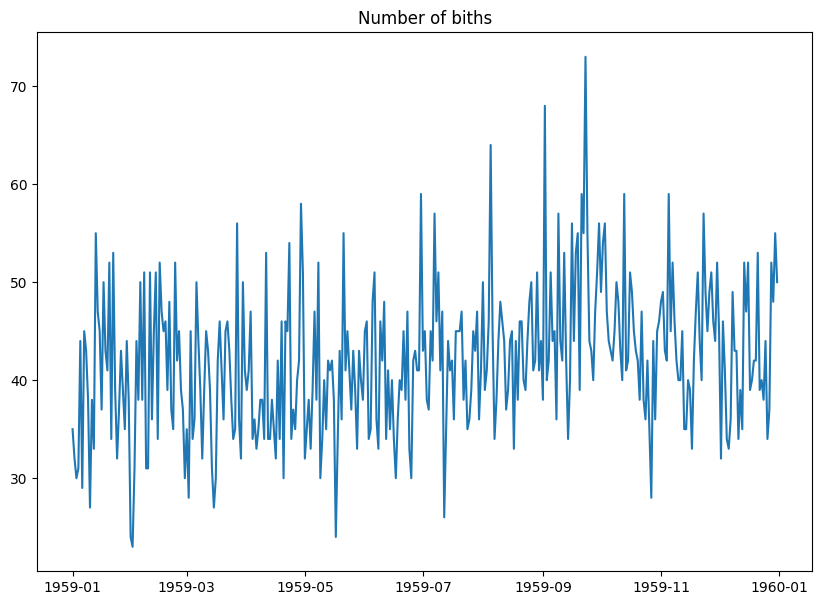

In [11]:
plt.figure(figsize=(10,7))
plt.plot(data)
plt.title('Number of biths over 1 year period')
plt.show()

In [12]:
type(data)

pandas.core.frame.DataFrame

## Decomposition

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x=data, model='multiplicative')
result

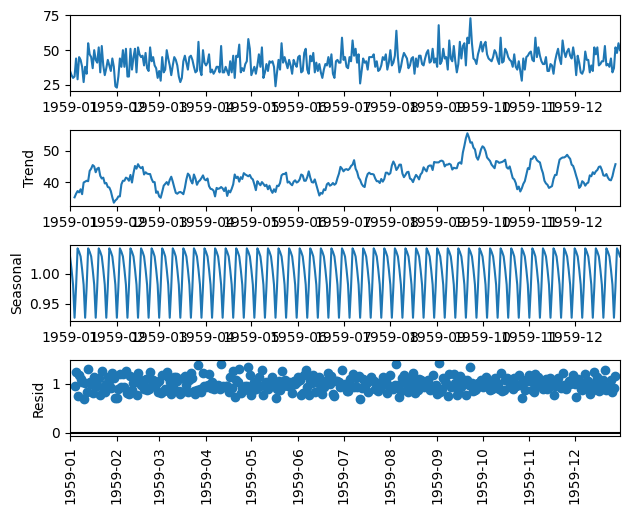

In [40]:
result.plot()
plt.xticks(rotation='vertical')
plt.show()

## Split train and test

In [28]:
train = data.loc['1959-01-01':'1959-07-31']
test = data.loc['1959-08-01':]

In [29]:
train

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-07-27,45
1959-07-28,43
1959-07-29,47


In [30]:
test

,Births
Date,
1959-08-01,50
1959-08-02,39
1959-08-03,41
1959-08-04,46
1959-08-05,64
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [31]:
test.shape

(153, 1)

## Build ARIMA model

In [18]:
from pmdarima.arima import auto_arima

In [19]:
model = auto_arima(data, start_p=2, start_q=2,
                      test='adf',
                      max_p=5, max_q=5,
                      m=12,             
                      d=1,          
                      seasonal=True,   
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=2.91 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2827.406, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2631.984, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2750.743, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2584.333, Time=0.41 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.76 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2660.446, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2564.537, Time=0.58 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2615.462, Time=0.23 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.83 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.13 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=2545.693, Time=0.65 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=2597.0

In [20]:
model.aic()

2530.7649396643897

## Fit model on train

In [32]:
model.fit(train)

ARIMA(order=(5, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [33]:
prediction = model.predict(n_periods=len(test))

In [34]:
prediction

1959-08-01    43.032788
1959-08-02    47.614141
1959-08-03    40.775050
1959-08-04    43.414103
1959-08-05    38.270036
                ...    
1959-12-27    31.127779
1959-12-28    32.229043
1959-12-29    37.408235
1959-12-30    38.289106
1959-12-31    37.503362
Freq: D, Length: 153, dtype: float64

In [35]:
test

,Births
Date,
1959-08-01,50
1959-08-02,39
1959-08-03,41
1959-08-04,46
1959-08-05,64
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


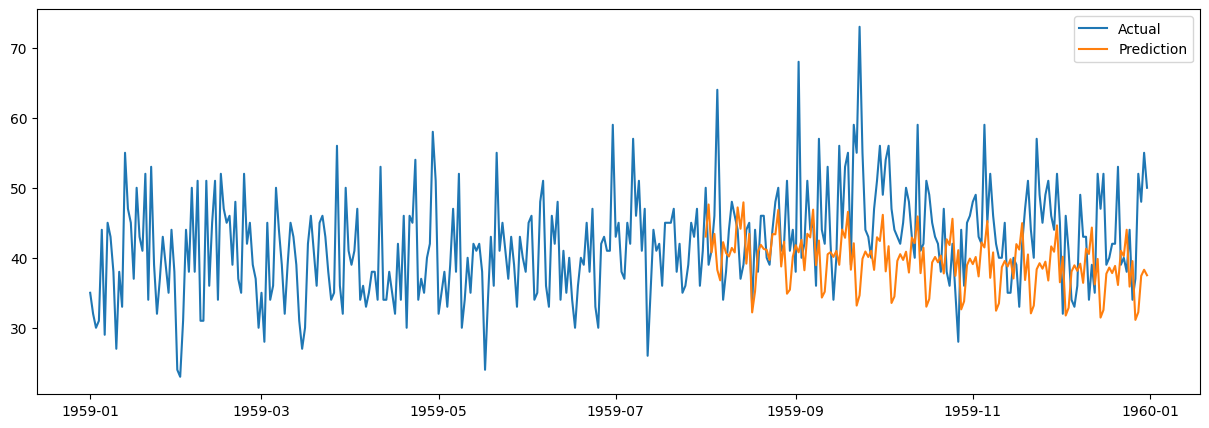

In [43]:
from matplotlib import pyplot as plt
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data, label = 'Actual')
ax.plot(prediction_series, label = 'Prediction')
plt.legend()
plt.show()

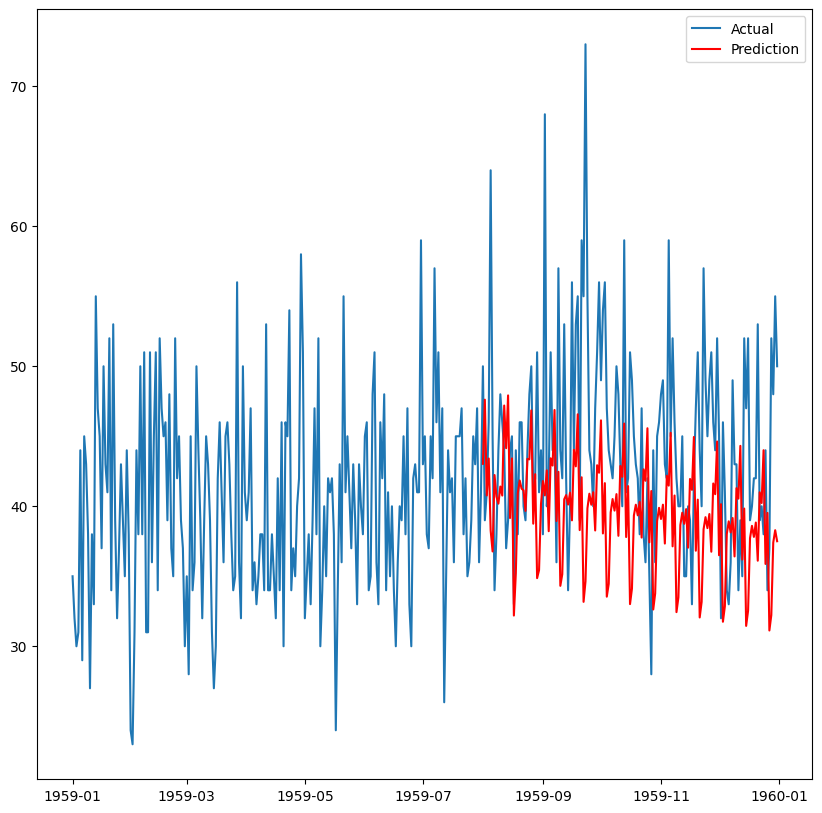

In [45]:
plt.figure(figsize=(10,10))
plt.plot(data,label='Actual')
plt.plot(prediction_series,label='Prediction',color='red')
plt.legend()
plt.show()

In [39]:
prediction

1959-08-01    43.032788
1959-08-02    47.614141
1959-08-03    40.775050
1959-08-04    43.414103
1959-08-05    38.270036
                ...    
1959-12-27    31.127779
1959-12-28    32.229043
1959-12-29    37.408235
1959-12-30    38.289106
1959-12-31    37.503362
Freq: D, Length: 153, dtype: float64

## Prediction for next 1 months

In [67]:
prediction_new = model.predict(n_periods=len(test)+31)

In [68]:
prediction_new

1959-08-01    43.032788
1959-08-02    47.614141
1959-08-03    40.775050
1959-08-04    43.414103
1959-08-05    38.270036
                ...    
1960-01-27    40.053537
1960-01-28    39.293727
1960-01-29    43.063271
1960-01-30    34.940628
1960-01-31    38.585019
Freq: D, Length: 184, dtype: float64

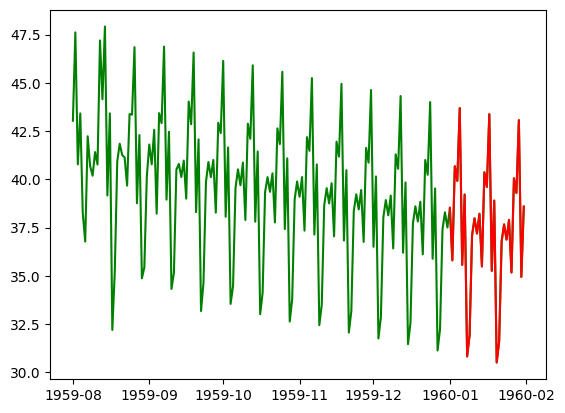

In [69]:
plt.plot(prediction_new,label='current pred',color='green')
plt.plot(prediction_new[len(test):],label='prediction for next 1 months',color='red')